# Unsupervised learning: Clustering & DimRed

**Кластеризация** - задача разбиения объектов на группы (кластеры). Кластеризация не использует правильные ответы при обучении(разметку), поэтому это задача *обучения без учителя*.<br>

**Задача кластеризации** -- разбить пространство объектов на группы таким образом, чтобы одинаковые объекты были в одной группе, а разные  -- в разных группах<br>

Все алгоритмы кластеризации так или иначе **вычисляют близость между объектами** (это может быть, например, косинусное расстояние) и стараются организовать кластеры так, чтобы между объектами одного кластера было небольшое расстояние.

**Популярные методы кластеризации:**
- Kmeans
- Mean-Shift Clustering
- DBSCAN
- EM (Expectation–Maximization), GMM (Gaussian Mixture Models)
- Agglomerative Hierarchical Clustering 


**Метрики для кластеризации:**
- Silhouette Score
- Rand Index
- Adjusted Rand Index
- Mutual Information
- Calinski-Harabasz Index
- Davies-Bouldin Index

Про метрики можно [почитать тут](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)



Данные могут распологаться в пространстве "странным" образом: без четких границ, например, или иметь "выбросы".

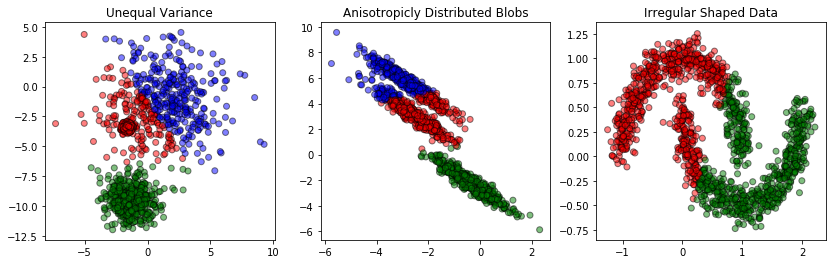
Так как считать близости между всеми объектами может быть долго, в конкретных алгоритмах кластеризации используются разные трюки (их мы рассмотрим в практической части).

# Практика - основная часть

У нас есть [датасет вин](https://www.kaggle.com/harrywang/wine-dataset-for-clustering), давайте попробуем их кластеризовать

In [1]:
# imports here
import pandas as pd
import numpy as np

#viz
import seaborn as sns
import matplotlib.pyplot as plt

# progress bar
from tqdm import tqdm

Открываем датасет и посмотрим на него

In [2]:
data = pd.read_csv('wine-clustering.csv')

In [3]:
print(data.shape)
data.head(5)

(178, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Параметры в датасете:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Проверим распределения параметров в датасете 
* если данные распределены нормально, сдвига не будет 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/446px-Negative_and_positive_skew_diagrams_%28English%29.svg.png">

In [8]:
data.skew() # можно посмотреть вот так сразу все столбцы

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

А можно сделать гистограммы для значений каждого столбца отдельно (каждый столбец = параметр в нашей будущей модели). Таким образом увидим распределение каждого и параметров. Это может быть полезно, так как:
* мы увидим распределение каждого параметра отдельно (выявим сдвиги, если они есть)
* определим выбросы

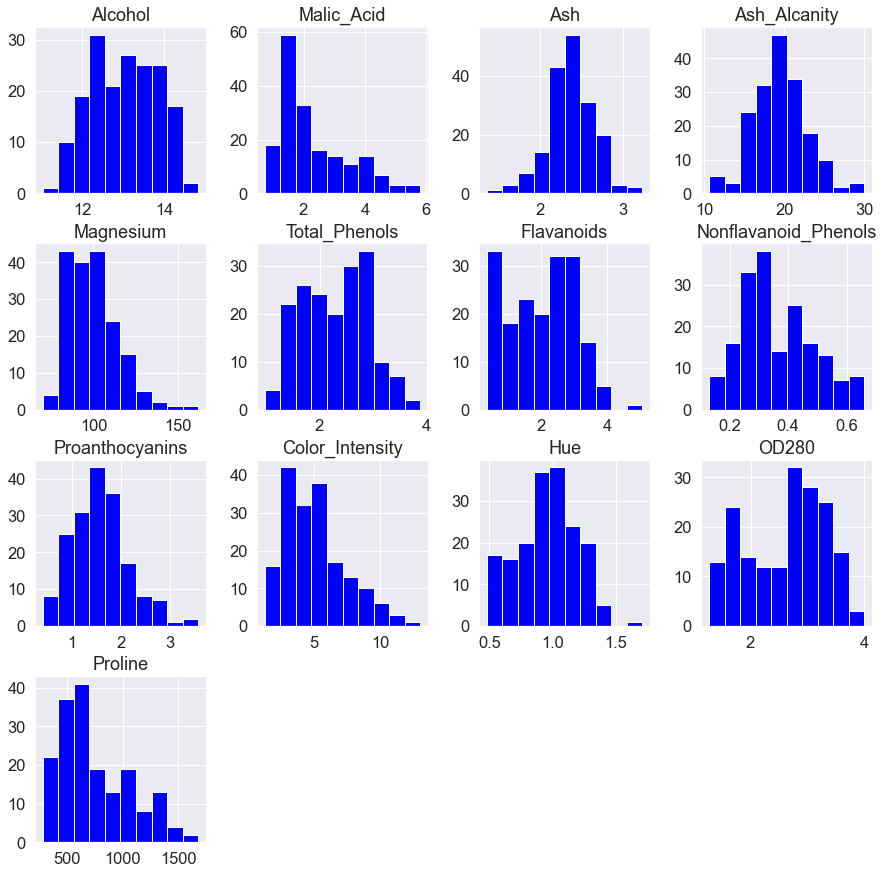

In [9]:
sns.set(font_scale=1.5, rc={'figure.figsize':(15,15)})

ax=data.hist(color='blue' )


# обратите внимание на начения x и y 

Проверим, есть ли у параметров нулевые значения:

In [11]:
data.isna().any().any()

False

## Подготовка данных 

В качестве основного алгоритма мы будем использовать K-means. Так как он использует дистанцию как основную метрику для определения данных в кластеры, давайте нормируем значения параметров, чтобы они определялись на едином промежутке

In [12]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_scaled=data.copy()
data_scaled[data_scaled.columns]=std_scaler.fit_transform(data_scaled)

In [13]:
data_scaled.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148


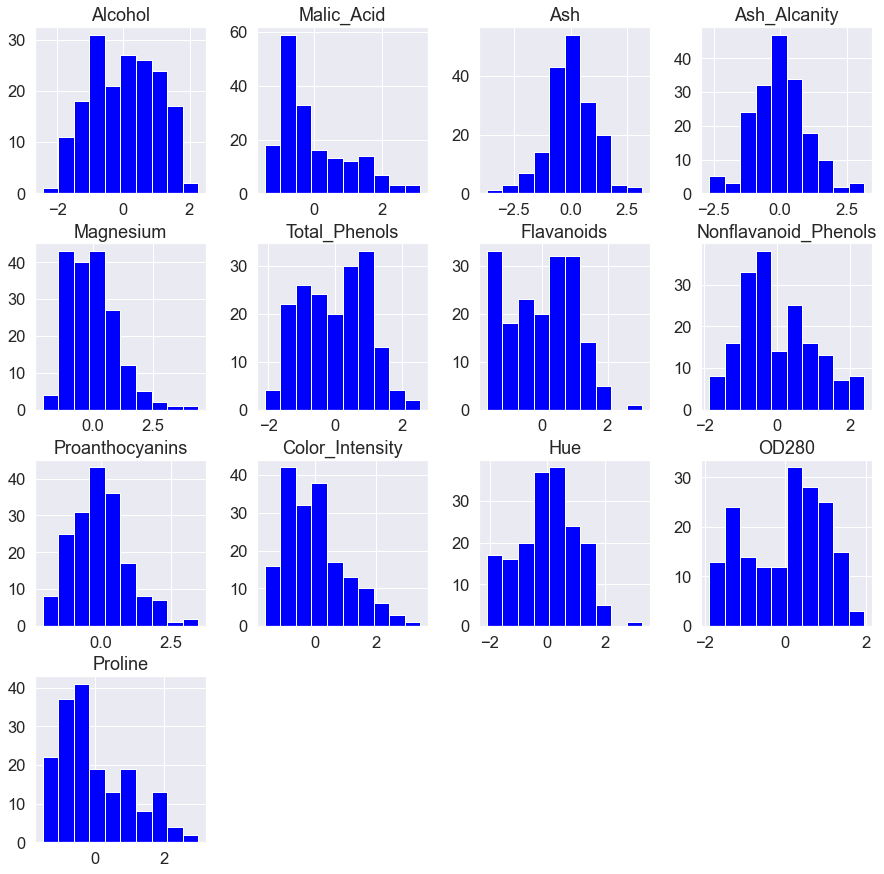

In [20]:
sns.set(font_scale=1.5, rc={'figure.figsize':(15,15)})

ax=data_scaled.hist(color='blue' )


# обратите внимание на начения x и y 

In [ ]:
display(data_scaled.min())
# data_scaled.max().max()

A еще можем нарисовать тепловую карту корреляций параметров:

<AxesSubplot:>

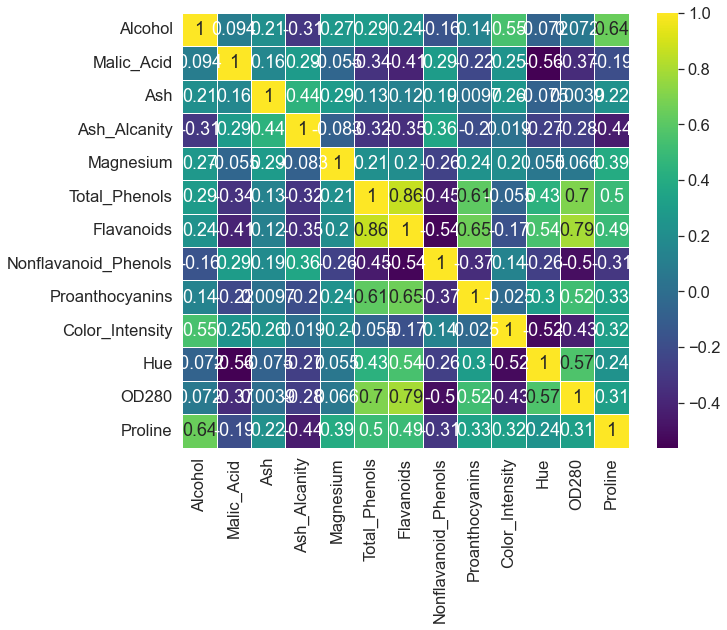

In [22]:
corr = data_scaled.corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr, linewidths=.5, cmap='viridis', annot=True)

**Мы имеем дело с многомерным датасетом:** каждый параметр обраует свое измерение, всего у нас 13-мерное пространство! Кластеры в таком пространстве эффективно собрать не получится, давайте уменьшим пространство: найдем две компоненты, вдоль которых существует наибольшая дисперсия данных. Такой метод называется методом главных компонент или PCA [Principle Component Analysis] (объяснение [полегче](https://habr.com/ru/post/304214/) и [посложнее](http://machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82))

In [29]:
from sklearn.decomposition import PCA
pca_2 = PCA(2) # задали количество компонент

pca_2_result = pca_2.fit_transform(data_scaled) 

pca_2_result.shape # массив длиной в кол-во строк датасета и шириной по числу компонент

(178, 2)

In [30]:
pca_2_result

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

Давайте это визуализируем

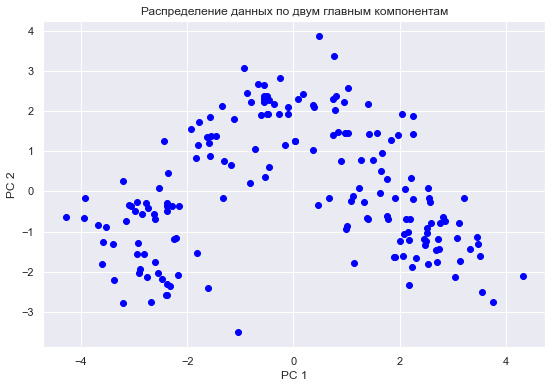

In [31]:
sns.set(rc={'figure.figsize':(9,6)},font_scale=1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='blue') # 0 и 1 - индексы колонок
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.title('Распределение данных по двум главным компонентам')
plt.show()

## Кластеризация

[здесь можно почитать про основные алгоритмы](https://scikit-learn.org/stable/modules/clustering.html)

**K-means (метод k средних)**

- Cлучайным образом в пространстве данных определяем k точек,называем их центроидами. 
- Оставшиеся точки относим к ближайшему для них центроиду  — получаются как бы "скопления" точек с некоторым центром.
- Определяем центр каждого "скопления", передвигаем центроид туда
- Повторяем предыдущий шаг, пока центроиды не перестанут двигаться.
- Готово. Кластеры обнаружены и стабильны

<img alt="" class="xb xw ep fd ez ku v c" width="480" height="480" role="presentation" src="https://miro.medium.com/max/960/1*KrcZK0xYgTa4qFrVr0fO2w.gif" srcset="https://miro.medium.com/max/552/1*KrcZK0xYgTa4qFrVr0fO2w.gif 276w, https://miro.medium.com/max/960/1*KrcZK0xYgTa4qFrVr0fO2w.gif 480w" sizes="480px">

[сорс](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)

**формула кластеризации** $\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$

**Плюсы:**
- относительно высокая скорость работы алгоритма <br>
(между $О(n^2)$ и $O(n)$, в среднем -- $О(nki)$ где $n$ - количество данных, $k$ - количество центров/кластеров, $i$ - число итераций алгоритма до устойчивости кластеров)

**Минусы**
- необходимо заранее знать, сколько кластеров понадобится (чему равно k)
- алгоритм недетерминированный, следовательно, реультаты могут именяться при каждом запуске (тк центроиды выбираются рандомно)

<img src="https://static-content.springer.com/image/prt%3A978-0-387-30164-8%2F12/MediaObjects/978-0-387-30164-8_12_Part_Fig2-425_HTML.jpg" alt="">

[сорс](https://link.springer.com/referenceworkentry/10.1007%2F978-0-387-30164-8_425)

Есть похожий алгоритм -- **K-Medians** -- при пересчитывании центра "скопления" точек, он использует не среднее, а медианное значения вектора группы точек.<br>
**Плюсы метода:** бóльшая устройчивость к статистическим выбросам (outliers)

**Минусы:** алгоритм более медленный, так как определение медианы на каждой итерации предполагает дополнительную сортировку данных

### Как определить число кластеров?

Такой вопрос часто задают на собеседованиях. Сделаем это с помощью двух методов: Silhouette Score и Elbow analysis

Сначала посчитаем *инерцию* (эта метрика считается как сумма квадратов ошибок для каждого кластера). Чем ниже значения инерции, тем более "плотные" получились кластеры, следовательно, тем лучше прошла кластеризация 

In [43]:
# пример на K-means для k=2

import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters = 2,
               init='k-means++', # метод, как разбросать центры среди данных
               n_init=15, # сколько раз будем переопределять центры (в результате выберем самый успешный)
               max_iter=500, # количество итераций а один проход алгоритма
               random_state=17 # сколько раз датасет перемешан перед кластеризацией
    ) 
    
    
kmeans.fit(pca_2_result) # обучаем модель 
print(kmeans.inertia_) # значение инерции для k=2: насколько хорошим было разбиение на 2 кластера


155.069204748917


Давайте проведем серию таких экспериментов:

In [52]:
# https://scikit-learn.org/stable/modules/clustering.html#k-means

import sklearn.cluster as cluster

inertia = [] # сюда будем сохранять значения
for i in tqdm(range(2,10)): # значения интервала - число кластеров (можно изменять) 
    
    kmeans = cluster.KMeans(
               n_clusters=i, # инициализируем модель
               init='k-means++', # метод, как разбросать центры среди данных
               n_init=15, # сколько раз будем переопределять центры (в результате выберем самый успешный)
               max_iter=500, # количество итераций а один проход алгоритма
               random_state=17 # сколько раз датасет перемешан перед кластеризацией
    ) 
    
    
    kmeans.fit(pca_2_result) # обучаем модель 
    inertia.append(kmeans.inertia_) # добавляем значения инерции для каждого числа кластеров
    
# print(inertia)

100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  4.91it/s]


In [53]:
for i in inertia:
    print(i)

628.7883507554766
259.5093807511931
192.39061530234838
155.06920474891703
122.83568482042277
99.24814548387027
89.20287759316702
80.49508342578419


Следующая метрика -- силуэты. Чем больше значение, тем лучше прошла кластеризация

Силуэты считаются как отношение среднего внутри кластера $a$ и среднего к ближайшему кластеру $b$ для каждой точки. $Silhouette Coefficient = \frac{(b - a) }{ max(a, b)}$

In [50]:
from sklearn.metrics import silhouette_score

# все как в предыдущей ячейке, только силуэт-скоры сохраняем как значения в словаре
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_2_result)
    
    silhouette[i] = silhouette_score(pca_2_result, kmeans.labels_, metric='euclidean')

print(silhouette)

100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.33it/s]

{2: 0.46491409089201524, 3: 0.5610505693103247, 4: 0.4914213395710318, 5: 0.4411644097008517, 6: 0.43281333057825544, 7: 0.42357060607218683, 8: 0.4083729282475446, 9: 0.39869725884517915}


Давайте это визуализируем:

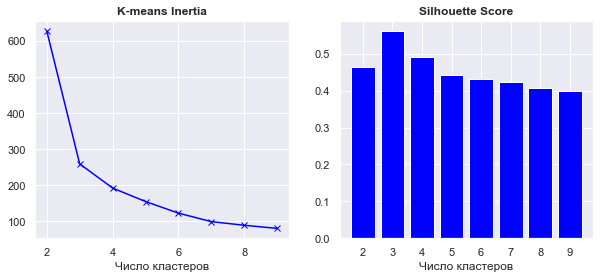

In [54]:
sns.set(font_scale=1, rc={'figure.figsize':(10,4)})

plt.subplot(1, 2, 1) # аргументы: nrows, ncols, index

plt.plot(range(2,len(inertia)+2), inertia, marker='x',color='blue') 
# первый параметр = x (число шагов= числу кластеров), второй = y (инерция)

plt.xlabel('Число кластеров')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2) # аргументы: nrows, ncols, index

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'blue')
plt.xticks(range(len(silhouette)), list(silhouette.keys())) # отметки на шкале
plt.grid(True)
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Число кластеров')


plt.show()

**k=3 - самое подходящее значение для количества кластеров на наших данных** (k=4 чуть хуже, но можно и его попробовать потом)

In [67]:
kmeans = cluster.KMeans(n_clusters=4,random_state=17,init='k-means++')

kmeans_labels = kmeans.fit_predict(pca_2_result)
# вычисляем центры кластеров и предугадываем номер кластера для каждого семпла данных

centroids = kmeans.cluster_centers_

display(pd.Series(kmeans_labels).value_counts()) # кол-во вин по кластерам
kmeans_labels

0    50
1    49
3    46
2    33
dtype: int64

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 2, 3, 2,
       2, 3, 3, 2, 3, 2, 3, 0, 2, 3, 3, 3, 2, 2, 3, 2, 3, 1, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 0, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [68]:
# #  добавим информацию о кластерах в датафрейм
data_scaled['Cluster']=kmeans_labels

pca_2_df = pd.DataFrame(pca_2_result)
pca_2_df['Cluster']=kmeans_labels

# data_scaled
# pca_2_df.shape

## PCA Clusters Visualization

было:

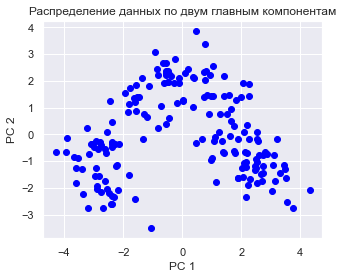

In [64]:
sns.set(rc={'figure.figsize':(5,4)},font_scale=1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='blue') # 0 и 1 - индексы колонок
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.title('Распределение данных по двум главным компонентам')
plt.show()

стало:

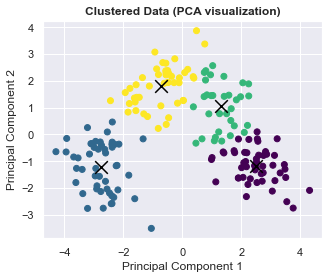

In [69]:
sns.set( rc={'figure.figsize':(5,4)},font_scale=1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=160, color='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# добавить легенду

plt.title('Clustered Data (PCA visualization)',fontweight='bold')

plt.show()

Осталось посчитать метрики:

In [70]:
# силуэты: определяется на промежутке [-1;1] (чем выше тем лучше)

# инерция: определяется от 0 и выше (чем ниже тем лучше)

print("Inertia score: %0.1f" % kmeans.inertia_,
     "\nSilhouette score: %0.1f" % silhouette_score(pca_2_result, kmeans.labels_, metric='euclidean'))

Inertia score: 192.4 
Silhouette score: 0.5


Границы кластеров довольно четкие, но сами кластеры "рыхлые"

# дополнительные алгоритмы кластеризации

#### Импотируем разные алгоритмы кластеризации и метрики 

In [71]:
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, DBSCAN,\
                            MeanShift, SpectralClustering

from sklearn import metrics

from sklearn.datasets import make_blobs

## AffinityPropagation

<img alt="8. Illustration of how affinity propagation works. Taken from [42]. |  Download Scientific Diagram" class="n3VNCb" src="https://www.researchgate.net/profile/Ferran-Torrent-Fontbona/publication/265969600/figure/fig8/AS:295818004320262@1447539916523/Illustration-of-how-affinity-propagation-works-Taken-from-42.png" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd;" style="width: 800px; height: 500px; margin: 0px;">

В AP специальным образом ([попарно](https://scikit-learn.org/stable/modules/clustering.html)) ищутся "экземпляры", объекты в выборке которые могут использоваться как центроиды. Ближайшие к ним объекты записываются в этот кластер.

**Приемущества AP** - не нужно подбирать количество кластеров.  
**Недостатки** - медленный *(не очень хорошо работает с дасетами 10к+ строчек)* и тратится много памяти, параметры не очевидные.

У AP два основных параметра - damping (чувствительность к обновлениям, можно рассматривать как learning rate, существует на промежутке [0.5; 1]) и preference(количество находимых экземпляров, чем выше значение, тем больше кластеров).

(Ещё можно поставить max_iter побольше 200, если обучение не сошлось)

[а вот вся документация к AP](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html#sklearn.cluster.AffinityPropagation)

In [72]:
data_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


In [77]:
X = data_scaled.drop("Cluster",axis=1) # матрица признаков и их весов

cluster = AffinityPropagation(damping=0.7, 
                              max_iter=400, random_state=17)
cluster.fit(X)

AffinityPropagation(damping=0.7, max_iter=400, random_state=17)

Метки кластеров для всех объектов в датасете лежат в cluster.labels_

In [78]:
labels = cluster.labels_
labels

array([ 4,  0,  2,  4,  1,  3,  0,  3,  0,  4,  0,  0,  0,  0,  0,  3,  3,
        3,  3,  4,  4,  2,  2,  2,  2,  1,  0,  0,  2,  0,  2,  0,  0,  3,
        2,  2,  3,  0,  0,  4,  4,  2,  4,  2,  2,  2,  4,  4,  2,  4,  0,
        0,  4,  3,  4,  2,  4,  3,  4,  5,  5,  5,  8,  8,  7,  2,  8,  8,
        5,  6, 14,  2, 10,  1,  2,  8,  8, 14,  6, 10,  8,  8,  7, 13, 10,
        8,  7,  7,  7,  7,  7,  7,  7,  8,  8,  6, 12,  8,  8,  8,  8,  8,
       10, 10, 10,  7, 10,  7, 10,  2,  9, 10,  7,  7, 10,  8, 10, 10, 14,
       10, 10,  1,  7,  9,  9, 10, 10,  7, 10,  7, 14, 14, 14, 14,  5,  5,
       14, 13, 13, 13, 13, 14, 13, 14, 14, 14, 14, 11, 11, 12, 12, 12, 12,
       11, 11, 11, 11, 13, 11, 11, 11, 13, 13, 14, 11, 11, 11, 11, 11, 12,
       14, 11, 11, 11, 11, 11, 11, 11])

Посмотрим сколько кластеров образовалось

In [81]:
display(pd.Series(labels).value_counts()) # кол-во вин по кластерам
# labels

11    21
2     19
0     17
8     17
10    17
7     16
4     15
14    15
3     10
13     9
5      6
12     6
1      4
6      3
9      3
dtype: int64

Давайте попробуем посчитать метрики 

In [82]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))

Silhouette Coefficient: 0.120


In [84]:
y = labels

Если помимо предсказанных лейблов (у нас они в переменной ```labels```) есть размеченные лейблы (```y```), можно использовать эти метрики:

(обычно их нет, поэтому это и обучение без учителя)

In [83]:
# эти три метрки что-то вроде точности, полноты и F-меры для кластеризации

print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
# проверяет, что в кластере объекты одного класса
print("Completeness: %0.3f" % metrics.completeness_score(y, labels)) 
# проверяет, что объекты класса только в одном кластере
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
# превращает обе метрики в одну 

print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))

NameError: name 'y' is not defined

Сложно сказать, насколько хорошие или плохие это числа. Давайте попробуем посмотреть глазами

In [85]:
data_scaled['Cluster'] = cluster.labels_

In [86]:
data_scaled.groupby(['Cluster']).mean() # перегруппировали датасет, теперь индексы - это кластеры

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Cluster,,,,,,,,,,,,,
0,0.979456,-0.542184,-0.148533,-1.217285,-0.188365,0.592211,0.842884,-0.635864,0.663186,0.077162,0.736391,0.570074,1.508853
1,-0.358990,-0.221138,2.242490,1.990906,1.773479,1.093411,1.310910,0.186507,0.528431,-0.322520,0.636386,1.014578,0.021835
2,0.331458,-0.161136,0.470612,-0.028510,0.099445,0.705268,0.735214,-0.685009,0.576613,-0.226842,0.415287,0.838395,0.567850
3,1.025742,-0.495823,1.028917,-0.587040,1.050281,1.020505,1.046867,-0.063285,0.065004,0.532887,0.783362,0.393103,1.731112
4,1.196620,-0.249265,0.022480,-1.113540,0.916876,1.347381,1.255692,-0.960388,0.736637,0.524236,0.043364,1.110624,0.950381
5,-0.455753,-0.894385,-1.053409,-1.029460,-0.239304,-0.419457,-1.098610,1.408607,-1.601812,-0.263762,0.025815,-1.311244,-0.390822
6,-0.820156,-0.990136,-1.461589,-0.789232,3.505408,-0.339340,-0.230179,-0.740141,2.200211,-0.911896,0.917907,0.082366,0.174426
7,-1.150332,-0.262655,0.394258,0.915511,-0.859522,-0.684175,-0.287907,0.997323,-0.234821,-0.988948,0.559608,0.020572,-0.780856
8,-0.787700,-0.700596,-1.262337,-0.459507,-0.774853,0.243469,0.316097,-0.569505,0.079845,-0.701973,1.193191,0.401412,-0.855165


In [87]:
data_scaled['Cluster']=labels

sns.set(rc={'figure.figsize':(9,6)},font_scale=1)

plt.scatter(x=data_scaled[:, 0], y=data_scaled[:, 1], color='blue') # 0 и 1 - индексы колонок
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')

plt.title('Распределение данных по двум главным компонентам')
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

## AgglomerativeClustering

<img alt="" class="xb xw ep fd ez ku v c" width="720" height="324" role="presentation" src="https://miro.medium.com/max/1440/1*ET8kCcPpr893vNZFs8j4xg.gif" srcset="https://miro.medium.com/max/552/1*ET8kCcPpr893vNZFs8j4xg.gif 276w, https://miro.medium.com/max/1104/1*ET8kCcPpr893vNZFs8j4xg.gif 552w, https://miro.medium.com/max/1280/1*ET8kCcPpr893vNZFs8j4xg.gif 640w, https://miro.medium.com/max/1400/1*ET8kCcPpr893vNZFs8j4xg.gif 700w" sizes="700px">

В агломеративной кластеризации каждому объекту припывается свой кластер и потом ближайшие кластеры постепенно объединяются, пока не получится общим супер-кластер. 

Когда рассказывают про этот вид кластеризации обычно рисуют вот такие картинки (дендрограммы). Предполагается, что можно посмотреть на то, как объекты постепенно соединяются и найти оптимальное количество кластеров. Однако это сработает только на небольшом количестве объектов, больше 100 объектов нарисовать будет сложно.

**Плюсы:** этот вид кластеризации может обработать большое количество данных <br>
**Минусы:** неудобная визуализация большого количества объектов
 

In [97]:
# так как визуально мы не может найти оптимальное количество кластеров, придется подбирать

X = data_scaled.drop("Cluster",axis=1) # матрица признаков и их весов
cluster = AgglomerativeClustering(n_clusters=2)
cluster.fit(X)

AgglomerativeClustering()

In [89]:
data_scaled['Cluster'] = cluster.labels_
data_scaled['Cluster'].value_counts() # кол-во вин по кластерам

# data_scaled.groupby(['Cluster']).mean()

2    64
0    58
1    56
Name: Cluster, dtype: int64

In [90]:
#todo
data_scaled['Cluster']=labels

sns.set(rc={'figure.figsize':(9,6)},font_scale=1)

plt.scatter(x=data_scaled= , y=data_scaled[:, 1], color='blue') # 0 и 1 - индексы колонок
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.title('Распределение данных по двум главным компонентам')
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [91]:
data_scaled[:, 0]

TypeError: '(slice(None, None, None), 0)' is an invalid key

Давайте попробуем посчитать метрики 

In [98]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, cluster.labels_))

Silhouette Coefficient: 0.267


## Mean Shift

<img alt="" class="xb xw ep fd ez ku v c" width="324" height="324" role="presentation" src="https://miro.medium.com/max/648/1*bkFlVrrm4HACGfUzeBnErw.gif" srcset="https://miro.medium.com/max/552/1*bkFlVrrm4HACGfUzeBnErw.gif 276w, https://miro.medium.com/max/648/1*bkFlVrrm4HACGfUzeBnErw.gif 324w" sizes="324px">

MS ищет плотные скопления объектов и ставит там кружочки определеного размера. Все, что попадает в кружочек, относится к кластеру. Количество кластеров задавать не нужно. 

Это первый из рассмотренных алгоритмов, который не относит к кластерам все объекты.

In [101]:
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [99]:
# bandwidth - как раз рамер этого кружка, но его сложно подбирать самому, т.к. в каждой задаче он будет свой
# вот так можно узнать, что будет по умолчанию и начать с этого значения, постепенно уменьшая или увеличивая
import sklearn

sklearn.cluster.estimate_bandwidth(X)

4.093314403687877

In [102]:
# cluster_all=False чтобы не записывать все объекты в кластеры
# X = data_scaled.drop("Cluster",axis=1)
cluster = MeanShift(cluster_all=False, bandwidth=3.5)
cluster.fit(X)

MeanShift(bandwidth=3.5, cluster_all=False)

Посмотрим сколько кластеров образовалось

In [103]:
len(set(cluster.labels_))

7

In [104]:
data_scaled['Cluster'] = cluster.labels_
data_scaled['Cluster'].value_counts() 

 0    79
 1    57
-1    36
 2     3
 4     1
 3     1
 5     1
Name: Cluster, dtype: int64

In [105]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, cluster.labels_))

Silhouette Coefficient: 0.194


In [ ]:
data_scaled['Cluster'] = cluster.labels_
# data_scaled.groupby(['Cluster']).mean()

Алгоритмы кластеризация, которые умеют отфильтровывать выбросы, приписывают им -1 кластер.

In [108]:
# так мы можем оценить, действительно ли отсеивается мусор или мы просто недокластеризуем
data_scaled[data_scaled['Cluster']==-1].mean()

Alcohol                -0.455409
Malic_Acid             -0.230364
Ash                    -0.094897
Ash_Alcanity            0.047395
Magnesium              -0.237354
Total_Phenols           0.209013
Flavanoids              0.178101
Nonflavanoid_Phenols    0.211128
Proanthocyanins         0.393131
Color_Intensity        -0.416724
Hue                     0.555951
OD280                   0.207132
Proline                -0.273880
Cluster                -1.000000
dtype: float64

## Spectral Clustering

В SC перед тем как кластерозовать к объектам применяется преобразование. Это преобразование должно приводить "странно" организованные в пространстве объекты к более стандартному виду, который могут переварить простые алгоритмы кластеризации (по дефолту используется KMEANS)

Так как кластируется через kmeans нужно подбирать количество кластеров самому.

In [109]:
X = data_scaled.drop("Cluster",axis=1)
cluster = SpectralClustering(n_clusters=3)
cluster.fit(X)

SpectralClustering(n_clusters=3)

Метки кластеров для всех объектов в датасете лежат в cluster.labels_

In [110]:
data_scaled['Cluster'] = cluster.labels_
data_scaled['Cluster'].value_counts() 

0    121
2     54
1      3
Name: Cluster, dtype: int64

Давайте попробуем посчитать метрики 

In [111]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, cluster.labels_))

Silhouette Coefficient: 0.249


In [ ]:
data_scaled['Cluster'] = cluster.labels_
data_scaled.groupby(['Cluster']).mean()

## DBSCAN

<img alt="" width="675" height="424" src="https://miro.medium.com/max/1350/1*tc8UF-h0nQqUfLC8-0uInQ.gif">

DBSCAN похож на MS и Spectral Clustering. К данным применяется некоторое преобразование, чтобы определить близкие объекты и ещё дальше откинуть выбросы. Потом выбирается какой-то объект, и в его окрестностях ищутся другие объекты. Если находятся, то эти объекты сливаются в один кластер и так далее до устойчивости. Если количество объектов в кластере меньше порога, то объекты считаются выбросами.

DBSCAN сам находит количество кластеров и умеет отфильтровывать выбросы. Параметрами можно настраивать объём окрестности и таким образом влиять на кластеры.

[Интерактивная визуализация](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

In [112]:
# eps - задает максимальную для объединения дистанцию между объектами == размер окрестности
# min_samples - минимальное количество объектов в классе

X = data_scaled.drop("Cluster",axis=1)
cluster = DBSCAN(min_samples=2, eps=0.5) 
cluster.fit(X)

DBSCAN(min_samples=2)

Метки кластеров для всех объектов в датасете лежат в cluster.labels_

In [113]:
data_scaled['Cluster'] = cluster.labels_
data_scaled['Cluster'].value_counts() 

-1    178
Name: Cluster, dtype: int64

Посмотрим сколько кластеров образовалось

In [ ]:
data_scaled['Cluster'] = cluster.labels_
data_scaled.groupby(['Cluster']).mean()

Давайте попробуем посчитать метрики 

In [114]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X,cluster.labels_ ))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

Есть еще HDBSCAN - оптимизированная версия DBSCAN. Его нет в sklearn, но есть [отдельная библиотека с аналогичным интерфейсом](https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html )